# FOR  KAGGLE

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_path = '/kaggle/input/titanic/train.csv'
test_path = '/kaggle/input/titanic/test.csv'
example_path = '/kaggle/input/titanic/gender_submission.csv'

# FOR OWN USAGE

In [11]:
train_path = 'data/train.csv'
test_path = 'data/test.csv'
example_path = 'data/gender_submission.csv'

# Imports

In [21]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid", palette="muted", context="notebook")

# Задача


Имеется датасет с информацией о пассажирах Титаника со следующими данными о каждом пассажире:
1. `PassengerId` - идентификатор пассажира внутри датасета
2. `Survived` - целевая переменная, выжил/не выжил при кораблекрушении
3. `Pclass` - класс каюты
4. `Name` - полное имя, содержит титутлы
5. `Sex` - пол
6. `Age` - возраст
7. `SibSp` - родственники(кроме родителей и детей) на корабле
8. `Parch` - кол-во родителей и детей на корабле
9. `Ticket` - идентификатор билета
10. `Fare` - цена билета
11. `Cabin` - номер кабины
12. `Embarked` - место, откуда соверашалась посадка

Как можно понять из описанных данных - предсказывать нужно выживаемость в катастрофе, в качестве метрики используется `accuracy`

# Data loading and check

In [12]:
data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)
example_submission = pd.read_csv(example_path)

In [13]:
print(f"'Train columnns: {', '.join(str(el) for el in data_train.columns)}")
print(data_train.info())
data_train.head(5)

'Train columnns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
print(f"'Test columnns: {', '.join(str(el) for el in data_test.columns)}")
print(data_test.info())
data_test.head(5)

'Test columnns: PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Missing values and data types

In [15]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
missing_train = data_train.isna().sum()
missing_train_relatively = missing_train / len(data_train)
missing_train_summary = pd.DataFrame({
    'missing_count' : missing_train,
    'missing_fraction' : missing_train_relatively.round(2)
                                    
})

missing_test = data_test.isna().sum()
missing_test_relatively = missing_test / len(data_test)
missing_test_summary = pd.DataFrame({
    'missing_count' : missing_test,
    'missing_fraction' : missing_test_relatively.round(2)
                                    
})


print(f"Train missing:\n {missing_train_summary}")
print(f"Test missing:\n {missing_test_summary}")

Train missing:
              missing_count  missing_fraction
PassengerId              0              0.00
Survived                 0              0.00
Pclass                   0              0.00
Name                     0              0.00
Sex                      0              0.00
Age                    177              0.20
SibSp                    0              0.00
Parch                    0              0.00
Ticket                   0              0.00
Fare                     0              0.00
Cabin                  687              0.77
Embarked                 2              0.00
Test missing:
              missing_count  missing_fraction
PassengerId              0              0.00
Pclass                   0              0.00
Name                     0              0.00
Sex                      0              0.00
Age                     86              0.21
SibSp                    0              0.00
Parch                    0              0.00
Ticket                  

# Exploratory Data Analysis

In [17]:
numerical_columns_continuous = data_train.select_dtypes(include = 'float64').columns.tolist()
numerical_columns_discrete = data_train.select_dtypes(include = 'int64').columns.tolist()
categorical_columns = data_train.select_dtypes(include = 'object').columns.tolist()

## Numerical

### Continuous

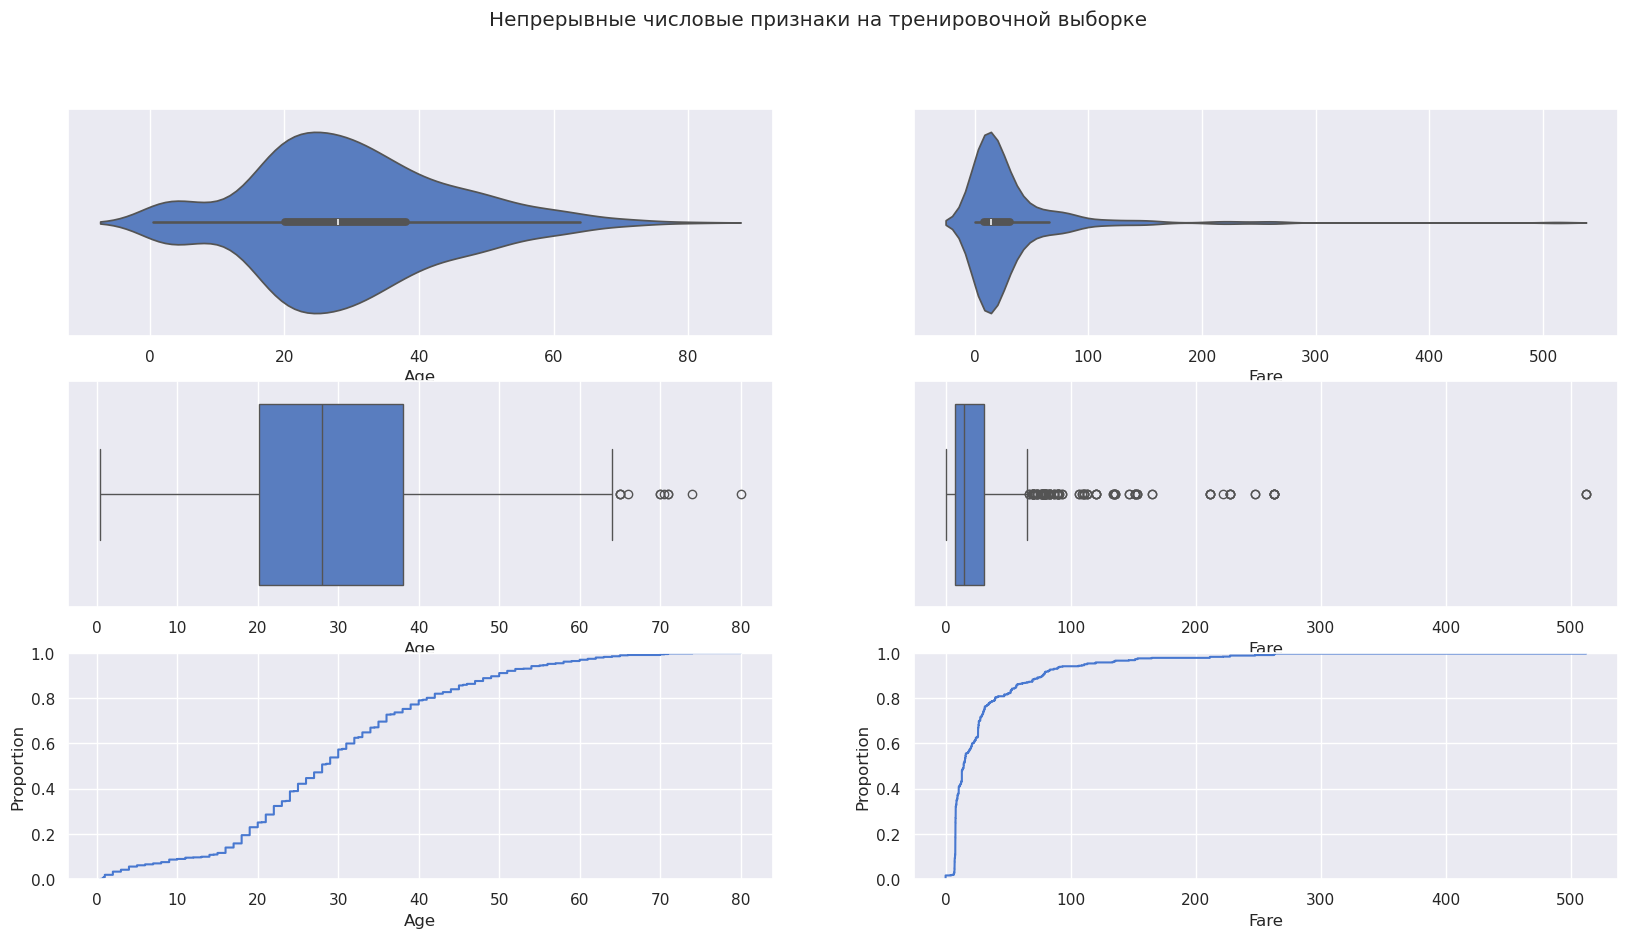

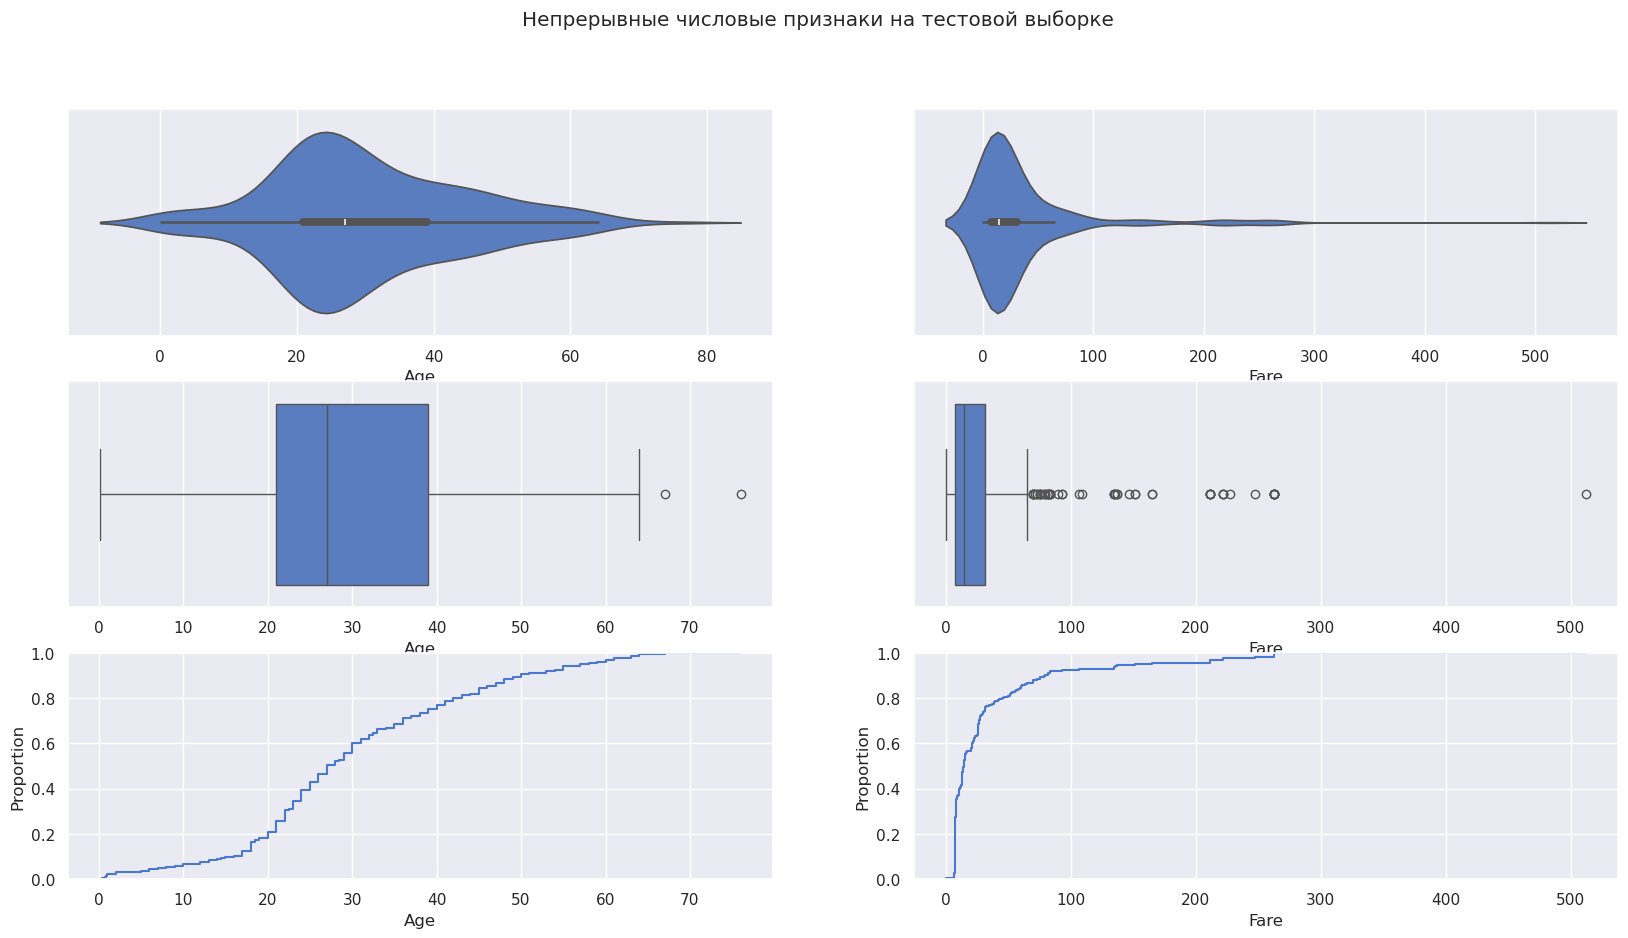

In [22]:
fig, ax = plt.subplots(3, len(numerical_columns_continuous), figsize = (10 * len(numerical_columns_continuous), 10))

for a, feature in zip(ax[0], numerical_columns_continuous):
    sns.violinplot(data = data_train, x = feature, ax = a)
for a, feature in zip(ax[1], numerical_columns_continuous):
    sns.boxplot(data = data_train, x = feature, ax = a)
for a, feature in zip(ax[2], numerical_columns_continuous):
    sns.ecdfplot(data = data_train, x = feature, ax = a)

fig.suptitle(f'Непрерывные числовые признаки на тренировочной выборке')
plt.show()

fig, ax = plt.subplots(3, len(numerical_columns_continuous), figsize = (10 * len(numerical_columns_continuous), 10))

for a, feature in zip(ax[0], numerical_columns_continuous):
    sns.violinplot(data = data_test, x = feature, ax = a)
for a, feature in zip(ax[1], numerical_columns_continuous):
    sns.boxplot(data = data_test, x = feature, ax = a)
for a, feature in zip(ax[2], numerical_columns_continuous):
    sns.ecdfplot(data = data_test, x = feature, ax = a)
    
fig.suptitle(f'Непрерывные числовые признаки на тестовой выборке')
plt.show()

### Discrete

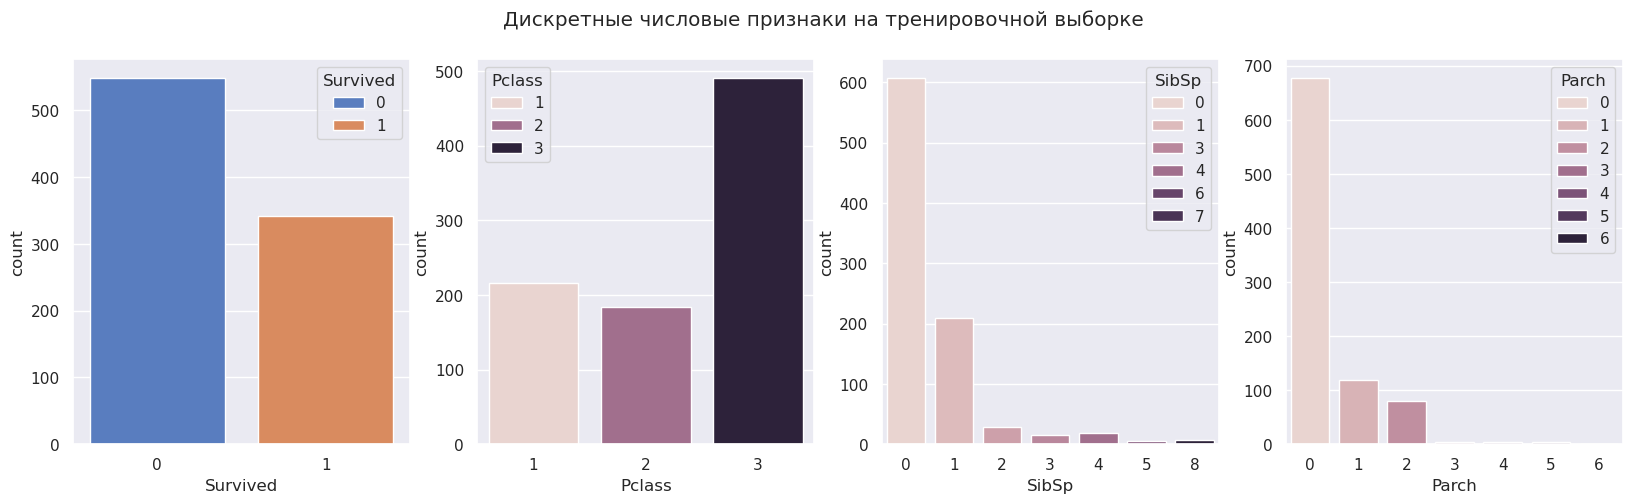

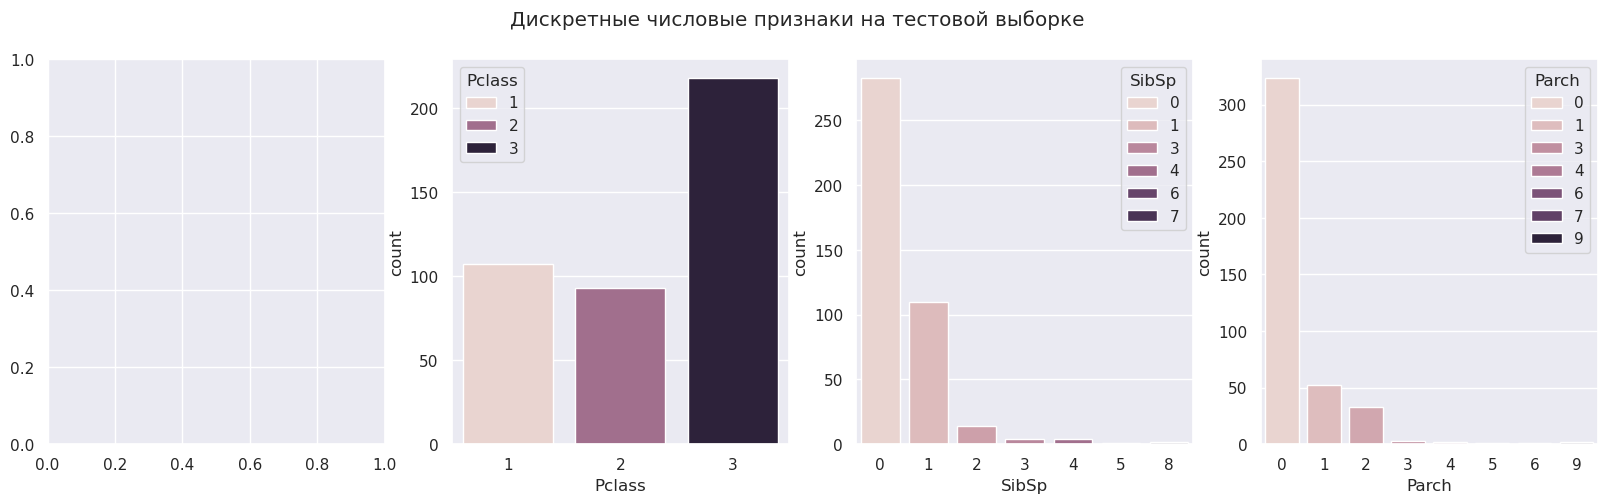

In [27]:
fig, ax = plt.subplots(1, len(numerical_columns_discrete[1:]), figsize = (5 * len(numerical_columns_discrete[1:]), 5))

for a, feature in zip(ax, numerical_columns_discrete[1:]):
    sns.countplot(data = data_train, x = feature, ax = a, hue = feature)

fig.suptitle(f'Дискретные числовые признаки на тренировочной выборке')
plt.show()

fig, ax = plt.subplots(1, len(numerical_columns_discrete[1:]), figsize = (5 * len(numerical_columns_discrete[1:]), 5))

for a, feature in zip(ax[1:], numerical_columns_discrete[2:]):
    sns.countplot(data = data_test, x = feature, ax = a, hue = feature)

fig.suptitle(f'Дискретные числовые признаки на тестовой выборке')
plt.show()

## Categorical

all categorical features: Name, Sex, Ticket, Cabin, Embarked


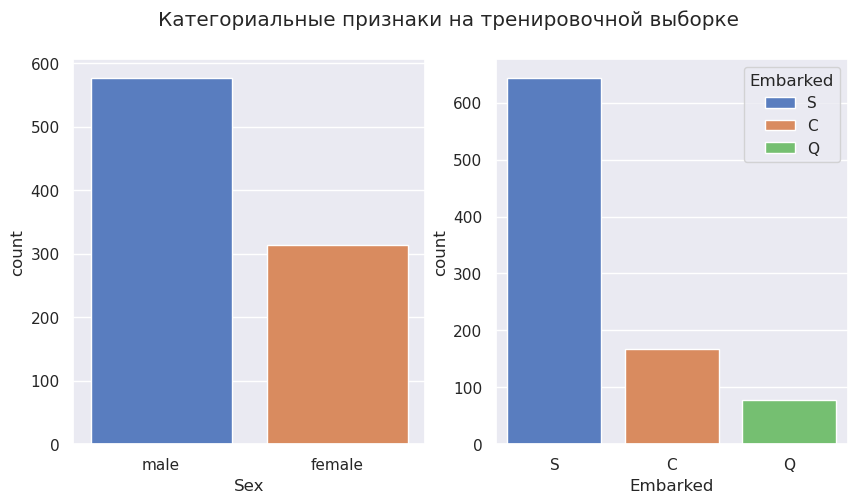

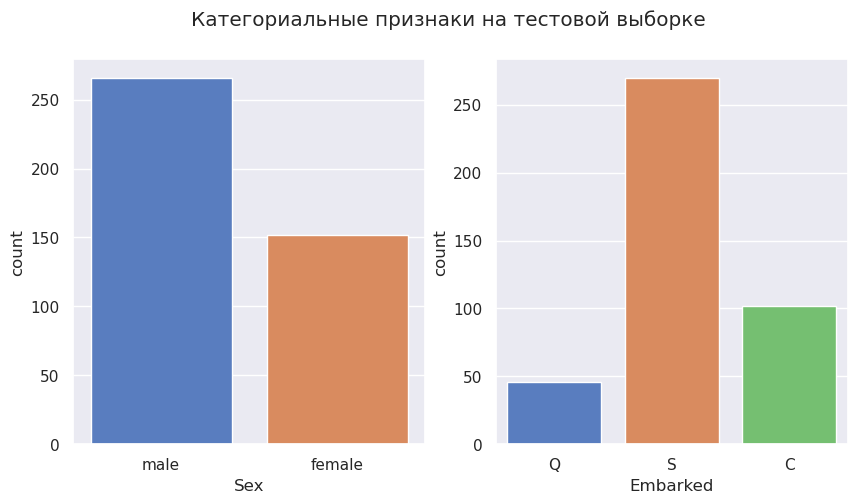

In [35]:
print(f"all categorical features: {', '.join(categorical_columns)}")
new_categorical = ['Sex', 'Embarked']

fig, ax = plt.subplots(1, len(new_categorical), figsize = (5 * len(new_categorical), 5))

for a, feature in zip(ax, new_categorical):
    sns.countplot(data = data_train, x = feature, ax = a, hue = feature)

fig.suptitle(f'Категориальные признаки на тренировочной выборке')
plt.show()

fig, ax = plt.subplots(1, len(new_categorical), figsize = (5 * len(new_categorical), 5))

for a, feature in zip(ax, new_categorical):
    sns.countplot(data = data_test, x = feature, ax = a, hue = feature)

fig.suptitle(f'Категориальные признаки на тестовой выборке')
plt.show()

## Relation between features

## Work with target